### Applying kNN and PCA to the [Kaggle Digit Recognizer](https://www.kaggle.com/c/digit-recognizer) Contest Using MNIST Data

Ben Van Dyke, January 2014

This IPython notebook shows my initial solution to the Kaggle Digit Recognizer Contest. I use various sklearn packages to perform PCA to reduce dimensionality, normalize the training and test data, perform cross validation on the training data and finally classify the test data. My submission in the contest ended up with a 0.96786 score, better than the benchmark kNN score. The performance is great considering the simplicity and readability of this implementation.

In [57]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cross_validation
import matplotlib.pyplot as plt
from __future__ import print_function

#### Preprocessing

In [8]:
# load the train and test data
train = np.loadtxt('train.csv',delimiter=',',skiprows=1)
test = np.loadtxt('test.csv',delimiter=',',skiprows=1)

In [10]:
# separate labels from training data
train_data = train[:,1:]
train_labels = train[:,0]

In [23]:
# select number of components to extract
pca = PCA(n_components=40)

In [24]:
# fit to the training data
pca.fit(train_data)

PCA(copy=True, n_components=40, whiten=False)

In [26]:
# determine amount of variance explained by components
np.sum(pca.explained_variance_ratio_)

0.78715300463419802

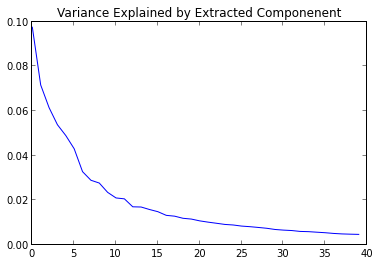

In [72]:
# plot the explained variance
plt.plot(pca.explained_variance_ratio_)
plt.title('Variance Explained by Extracted Componenent')
plt.show()

With 40 components extracted, about 79% of the total variance in the dataset is explained. 

In [68]:
# extract the features
train_ext = pca.fit_transform(train_data)
print(train_ext.shape)

(42000, 40)


Here is the impact of the feature extraction, now the training data is 40 columns wide.

In [69]:
# transform the test data using the existing parameters
test_ext = pca.transform(test)
print(test_ext.shape)

(28000, 40)


Because we are using a nearest neighbors classifier based on distance, the data needs to be normalized.

In [70]:
min_max_scaler = MinMaxScaler()

In [35]:
train_norm = min_max_scaler.fit_transform(train_ext)
test_norm = min_max_scaler.fit_transform(test_ext)

#### Training

In [40]:
# fit the model to the training data using defaults
# n_neighors = 5
knn = KNeighborsClassifier()
knn.fit(train_norm, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           n_neighbors=5, p=2, weights='uniform')

In [71]:
cross_validation.cross_val_score(knn, train_norm, train_labels, cv=5)

array([ 0.96892857,  0.96928571,  0.97178571,  0.96535714,  0.96964286])

Performing the five-fold cross-validation provides a look at the possible performance on unobserved data drawn from the same population. In this case, the classifier performed well, about 97% accuracy across the folds.

#### Predicting

In [41]:
# predict the test classes
pred = knn.predict(test_norm)

In [53]:
 # write to a file
save = pred.round()
ind = np.arange(1,len(pred) + 1)
new_save = np.column_stack((ind, save))
np.savetxt('knnpca.csv',new_save,delimiter=',',fmt='%0.0f')